<a href="https://colab.research.google.com/github/bingsen-wang/Electric-Machines/blob/main/Resolver_basicPrinciple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Excitation, Sine and Cosine Signals of resolvers</h1></b>

Dr. Bingsen Wang

11/8/2025
</center>

#Python Code

0
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
0


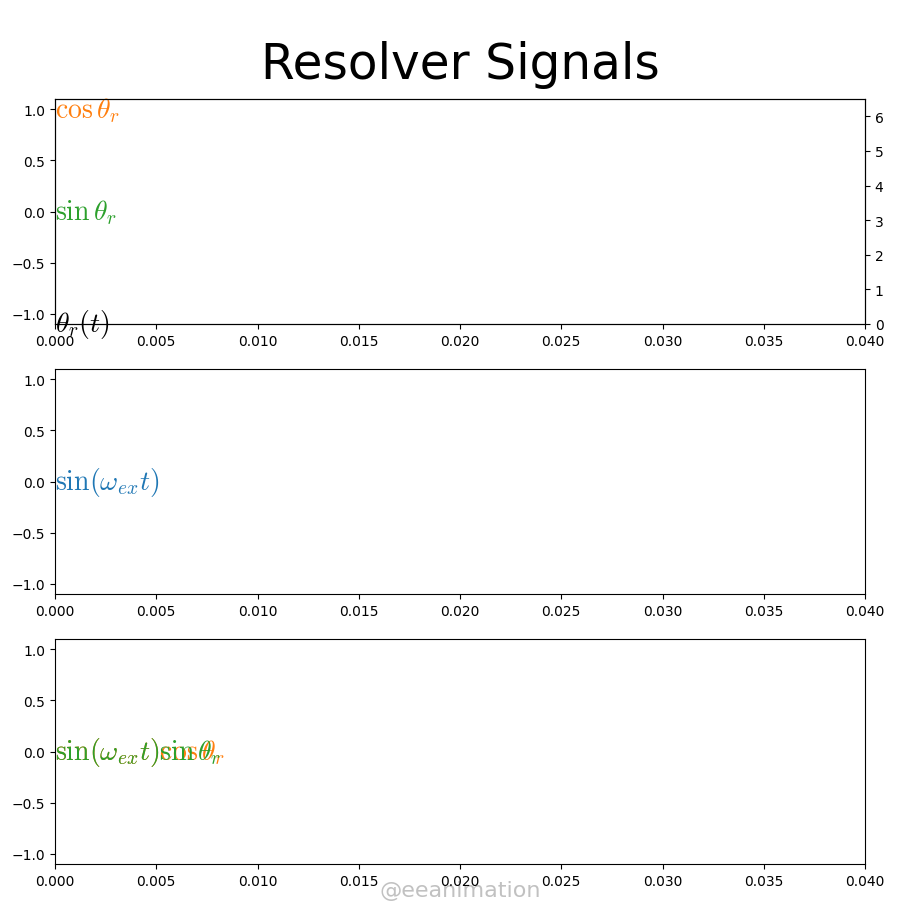

In [64]:
from matplotlib import pyplot,animation,cm
import numpy as np
pyplot.rcParams.update({"font.family":"sans-serif", "mathtext.fontset":"cm"})

vexc = lambda t,f: np.sin(2*np.pi*f*t)
vsin = lambda t,fe,f1,pp: vexc(t,fe)*np.sin(2*np.pi*f1*t*pp)
vcos = lambda t,fe,f1,pp: vexc(t,fe)*np.cos(2*np.pi*f1*t*pp)

Nf=480*3;pp=1; kr=1; f1=50;fexc=f1*30
t=np.linspace(0,2/f1,Nf*kr)
theta =(2*np.pi*f1*t)%(2*np.pi)
st = np.sin(theta); ct = np.cos(theta)
vexc = np.sin(2*np.pi*fexc*t)
st_fb = vexc*np.sin(theta); ct_fb = vexc*np.cos(theta)

cl = list(cm.tab10.colors) #colors of lines
fig = pyplot.figure(figsize=([9,9]))
ax = fig.add_axes([0,0,1,1],xlim=[-1.2,1.2],ylim=[-1.2,1.25]);ax.axis('off')
ax1 = fig.add_axes([.05,.65,.9,.25],xlim=[0,2/f1],ylim=[-1.1,1.1])
ax12 = ax1.twinx()
ax12.set_ylim([0,6.5])
ax2 = fig.add_axes([.05,.35,.9,.25],xlim=[0,2/f1],ylim=[-1.1,1.1])
ax3 = fig.add_axes([.05,.05,.9,.25],xlim=[0,2/f1],ylim=[-1.1,1.1])
ax.text(0,1.1,'Resolver Signals',ha='center',va='center',size=35 )
lines=[ax12.plot([],[],c='k',lw=1.5)[0]]
txts=[ax12.text(0,0,r'$\theta_r(t)$',size=20,va='center',c=lines[0].get_color())]
lines+=[ax1.plot([],[],c=cl[1+k],lw=1.5)[0] for k in range(2)]
txts+=[ax1.text(0,0,[r'$\cos\theta_r$',r'$\sin\theta_r$'][k],size=20,va='center',c=lines[1+k].get_color()) for k in range(2)]
lines+=[ax2.plot([],[],c=cl[0],lw=1.5)[0]]
txts+=[ax2.text(0,0,r'$\sin(\omega_{ex}t)$',size=20,va='center',c=lines[-1].get_color())]
lines+=[ax3.plot([],[],c=cl[1+k],lw=1.5)[0]for k in range(2)]
txts+=[ax3.text(0,0,[r'$\sin(\omega_{ex}t)\cos\theta_r$',r'$\sin(\omega_{ex}t)\sin\theta_r$'][k],size=20,va='center',c=lines[-2+k].get_color()) for k in range(2)]

def animate(i):
  if i%100==0: print(i)
  lines[0].set_data(t[:i*kr+1],theta[:i*kr+1])
  txts[0].set_position((t[i*kr],theta[i*kr]))
  [lines[1+k].set_data(t[:i*kr+1],[ct,st][k][:i*kr+1])for k in range(2)]
  [txts[1+k].set_position((t[i*kr],[ct,st][k][i*kr]))for k in range(2)]
  lines[3].set_data(t[:i*kr+1],vexc[:i*kr+1])
  txts[3].set_position((t[i*kr],vexc[i*kr]))
  [lines[-2+k].set_data(t[:i*kr+1],[ct_fb,st_fb][k][:i*kr+1])for k in range(2)]
  [txts[-2+k].set_position((t[i*kr],[ct_fb,st_fb][k][i*kr]))for k in range(2)]
  return
ax.text(np.average(ax.get_xlim()),ax.get_ylim()[0]*.99+ax.get_ylim()[1]*.01,r'@eeanimation',size=16,c='.2',alpha=.3,ha='center',va='bottom')
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=20)
anim.save("ResolverPrinciple.mp4",writer=animation.FFMpegWriter(fps=60),dpi=200)